# K-means聚类

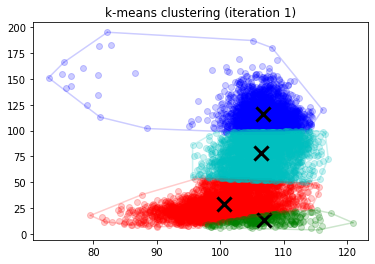

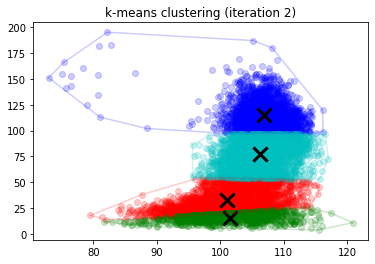

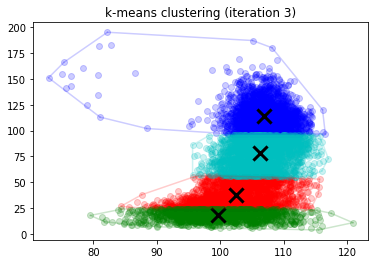

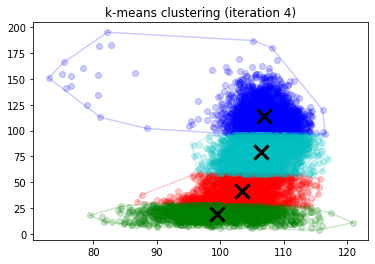

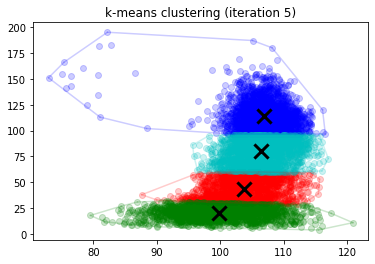

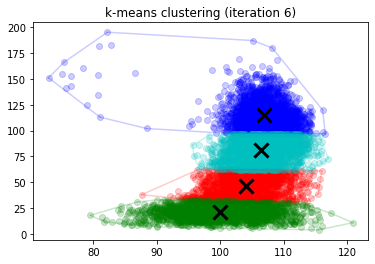

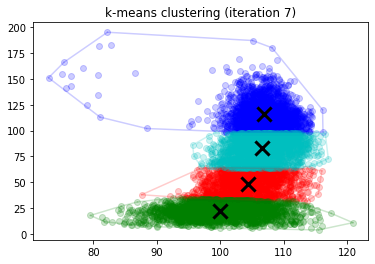

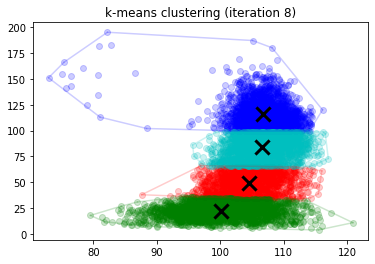

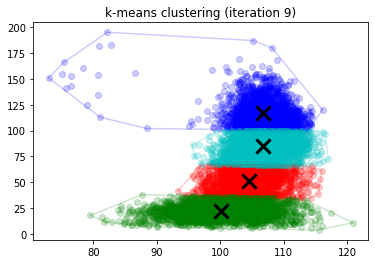

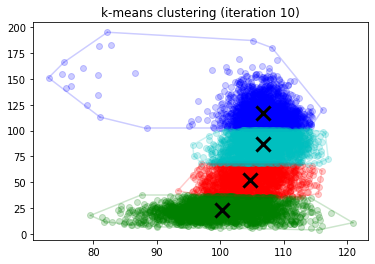

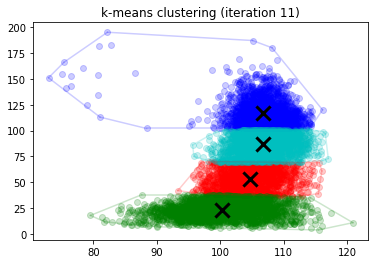

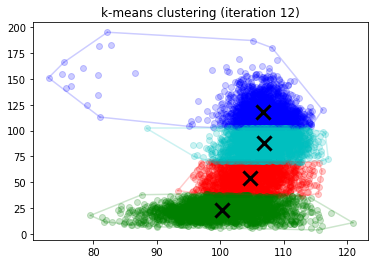

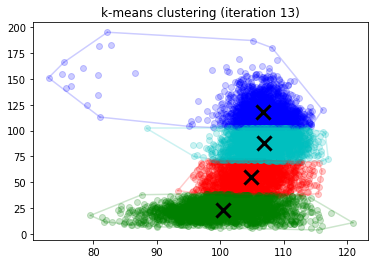

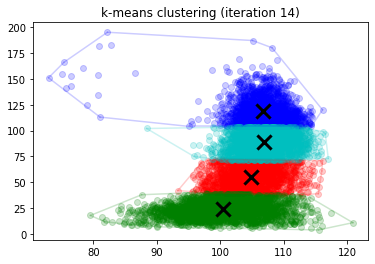

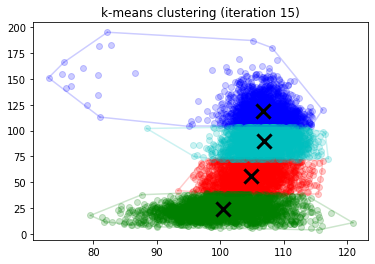

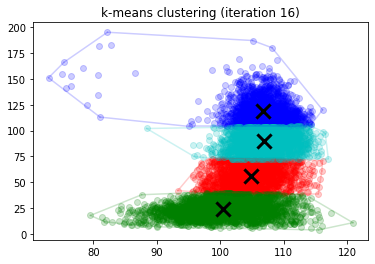

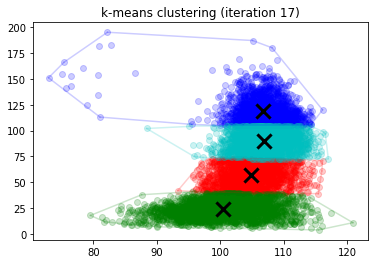

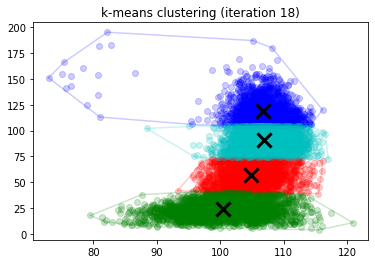

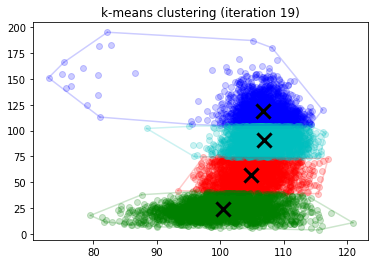

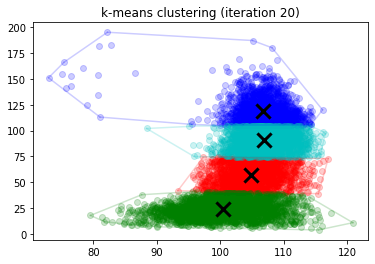

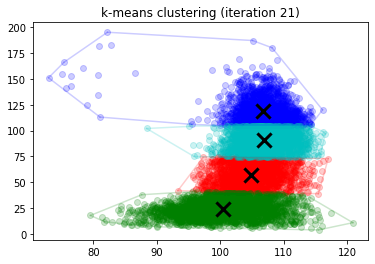

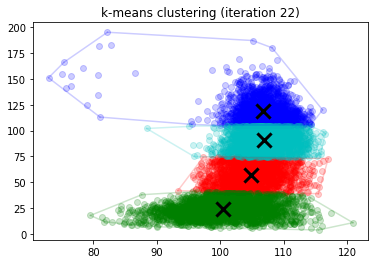

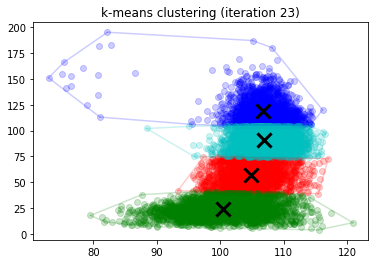

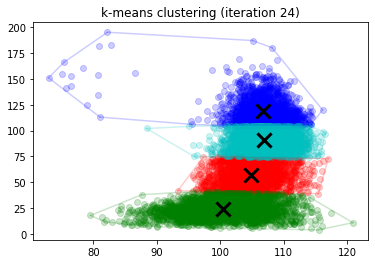

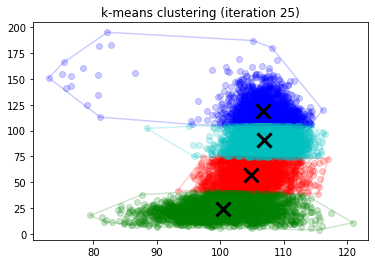

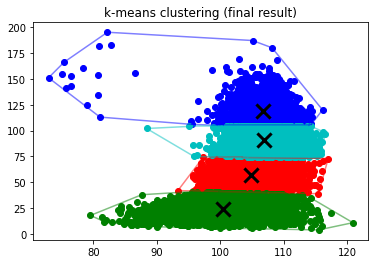

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import pandas as pd

def kmeans(X, k, max_iter=100):
    """
    k-means聚类算法实现
    
    参数：
    X -- 二维数据矩阵，每行表示一个样本
    k -- 聚类的数目
    max_iter -- 最大迭代次数
    
    返回：
    centroids -- k个聚类中心
    history -- 聚类过程，是一个数组，表示每个迭代的聚类结果
    """
    # 随机选择k个中心点
    idx = np.random.randint(X.shape[0], size=k)
    centroids = X[idx, :]
    
    # 初始化聚类结果
    clusters = np.zeros(X.shape[0])
    history = []
    
    for i in range(max_iter):
        # 分配每个样本到最近的聚类中心
        for j in range(X.shape[0]):
            dist = np.linalg.norm(X[j, :] - centroids, axis=1)
            clusters[j] = np.argmin(dist)
        
        # 更新聚类中心
        for c in range(k):
            centroids[c, :] = np.mean(X[clusters == c, :], axis=0)
        
        # 将本次迭代的结果保存到history中
        history.append(deepcopy(clusters))
        
        # 可视化聚类过程
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for c in range(4):
            plt.scatter(X[clusters == c, 0], X[clusters == c, 1], c=colors[c], alpha=0.2)
            plt.scatter(centroids[c, 0], centroids[c, 1], marker='x', s=200, linewidths=3, color='k')
            # 计算凸包
            points = X[clusters == c, :]
            hull = ConvexHull(points)
            # 绘制凸包
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], c=colors[c], alpha=0.2)
        plt.title('k-means clustering (iteration {})'.format(i+1))
        plt.show()
                           
        # 如果聚类结果不再发生变化，则算法收敛并跳出循环
        if len(history) > 1 and np.all(history[-1] == history[-2]):
            break
    
    return centroids, history


#导入数据
df = pd.read_csv('Traffic_flow.csv',delimiter=',',header=None)
df.columns = ['位置','时间','流量','速度','占有率','方向']
df = df[df['方向']==0]
X = df[['速度','流量']].values

# 运行k-means聚类算法
centroids, history = kmeans(X, 4, max_iter=100)

# 可视化最终的聚类结果
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
clusters = history[-1]
for c in range(4):
    plt.scatter(X[clusters == c, 0], X[clusters == c, 1], c=colors[c])
    plt.scatter(centroids[c, 0], centroids[c, 1], marker='x', s=200, linewidths=3, color='k')
    # 计算凸包
    points = X[clusters == c, :]
    hull = ConvexHull(points)
    # 绘制凸包
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], c=colors[c], alpha=0.5)
plt.title('k-means clustering (final result)')
plt.show()

# 二分K-means聚类

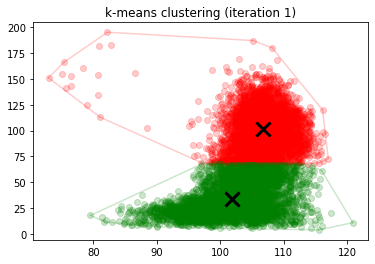

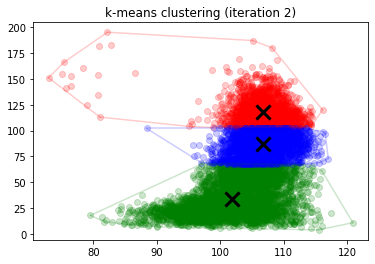

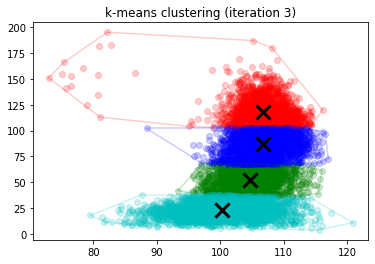

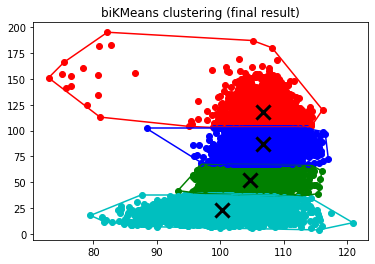

In [53]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial import ConvexHull
import pandas as pd

def binary_kmeans(data, k):
    """
    二分K均值聚类
    data: 数据集，二维numpy数组
    k: 簇的数量
    """
    # 将所有数据点归为一个簇
    clusters = [data]

    # 持续迭代，直到簇的数量达到k
    while len(clusters) < k:
        # 选择一个SSE最大的簇进行划分
        max_sse = -1
        for i, cluster in enumerate(clusters):
            kmeans = KMeans(n_clusters=2, random_state=0).fit(cluster)
            sse = kmeans.inertia_
            if sse > max_sse:
                max_sse = sse
                max_cluster_index = i
                max_cluster = cluster
                max_cluster_labels = kmeans.labels_

        # 将该簇划分为两个簇
        cluster_1 = max_cluster[max_cluster_labels == 0]
        cluster_2 = max_cluster[max_cluster_labels == 1]
        clusters[max_cluster_index] = cluster_1
        clusters.append(cluster_2)

        # 可视化聚类过程
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, cluster in enumerate(clusters):
            plt.scatter(cluster[:,0], cluster[:,1], c=colors[i], alpha=0.2)
            plt.scatter(np.mean(cluster, axis=0)[0], np.mean(cluster, axis=0)[1], marker='x', s=200, linewidths=3, color='k')
            # 计算凸包
            points = cluster
            hull = ConvexHull(points)
            # 绘制凸包
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], c=colors[i], alpha=0.2)
        plt.title('k-means clustering (iteration {})'.format(len(clusters)-1))
        plt.show()

    return clusters


# 导入数据
df = pd.read_csv('Traffic_flow.csv', delimiter=',', header=None)
df.columns = ['位置', '时间', '流量', '速度', '占有率', '方向']
df = df[df['方向'] == 0]
X = df[['速度', '流量']].values

# 运行binary_kmeans聚类算法
clusters = binary_kmeans(X, 4)

# 可视化最终的聚类结果
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i])
    plt.scatter(np.mean(cluster, axis=0)[0], np.mean(cluster, axis=0)[1], marker='x', s=200, linewidths=3, color='k')
    # 计算凸包
    points = cluster
    hull = ConvexHull(points)
    # 绘制凸包
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], c=colors[i])
plt.title('biKMeans clustering (final result)')
plt.show()

# PAM（K-Medoids）聚类

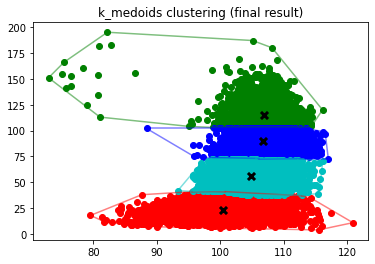

In [25]:
import numpy as np

def k_medoids(data, k, max_iter=100):
    """
    PAM（K-Medoids）聚类
    data: 数据集，二维numpy数组
    k: 簇的数量
    max_iter: 最大迭代次数，默认为100
    """
    # 随机选择k个数据点作为medoids的初始值
    medoids_index = np.random.choice(data.shape[0], size=k, replace=False)
    medoids = data[medoids_index]
    
    # 迭代计算
    for i in range(max_iter):
        # 根据当前的medoids计算每个数据点到medoids的距离，找出最近的medoid作为该点的簇中心
        distances = np.sum(np.abs(data[:, np.newaxis] - medoids), axis=2)
        labels = np.argmin(distances, axis=1)
        
        # 计算当前的cost
        cost = np.sum(np.min(distances, axis=1))
        
        # 在当前的簇中，选择一个非medoid的点作为新的medoid，如果更优则更新medoids
        for j in range(k):
            cluster = data[labels == j]
            for point in cluster:
                if np.array_equal(point, medoids[j]):
                    continue
                new_medoids = medoids.copy()
                new_medoids[j] = point
                new_distances = np.sum(np.abs(data[:, np.newaxis] - new_medoids), axis=2)
                new_cost = np.sum(np.min(new_distances, axis=1))
                if new_cost < cost:
                    medoids[j] = point
                    cost = new_cost
        
    return medoids, labels


#导入数据
df = pd.read_csv('Traffic_flow.csv',delimiter=',',header=None)
df.columns = ['位置','时间','流量','速度','占有率','方向']
df = df[df['方向']==0]
X = df[['速度','流量']].values

# 运行k_medoids聚类算法
centroids, labels = k_medoids(X, 4)


# 可视化最终的聚类结果
clusters = labels
colors = ['r', 'g', 'b', 'c']
for c in range(4):
    plt.scatter(X[clusters == c, 0], X[clusters == c, 1], c=colors[c])
    plt.scatter(centroids[c][0], centroids[c][1], marker='x', s=50, linewidths=3, color='k')
    # 计算凸包
    points = X[clusters == c, :]
    hull = ConvexHull(points)
    # 绘制凸包
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], c=colors[c], alpha=0.5)
plt.title('k_medoids clustering (final result)')
plt.show()

# AGNES层次聚类

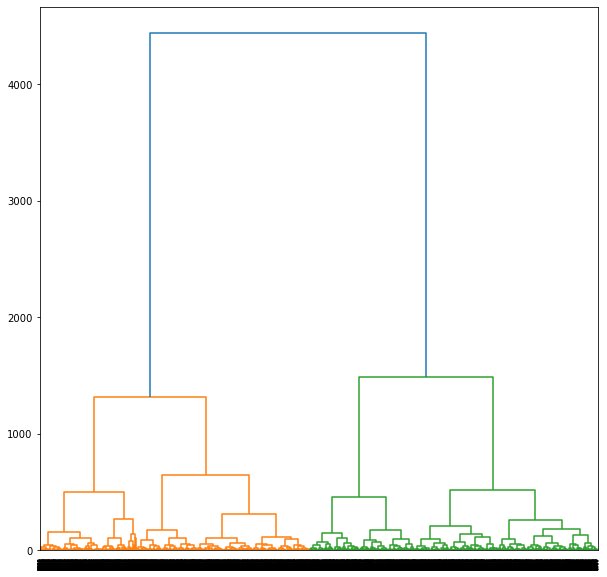

In [14]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#导入数据
df = pd.read_csv('Traffic_flow.csv',delimiter=',',header=None)
df.columns = ['位置','时间','流量','速度','占有率','方向']
df = df[df['方向']==0]
X = df[['速度','流量']].values

# 计算距离矩阵
Z = linkage(X, 'ward')

# 绘制树状图
fig, ax = plt.subplots(figsize=(10, 10))
dendrogram(Z, ax=ax)
plt.show()

# DBSCAN聚类

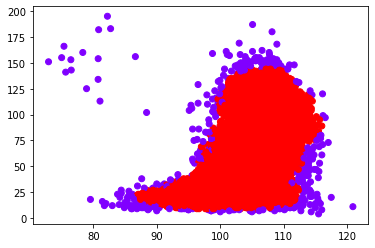

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

#导入数据
df = pd.read_csv('Traffic_flow.csv',delimiter=',',header=None)
df.columns = ['位置','时间','流量','速度','占有率','方向']
df = df[df['方向']==0]
X = df[['速度','流量']].values

# 使用DBSCAN算法进行聚类
dbscan = DBSCAN(eps = 2, min_samples = 18)
dbscan_labels = dbscan.fit_predict(X)

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow')
plt.show()

# 簇评估

Hopkins statistic: 0.9691438177432614
Spearman Correlation: 0.69


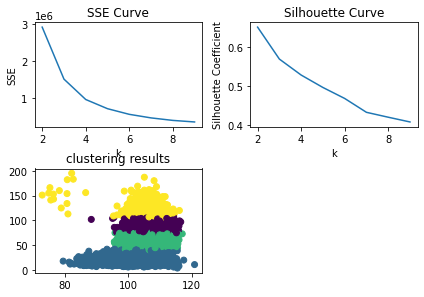

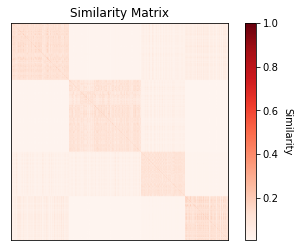

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


def hopkins(X, n_neighbors=10):
    """
    计算数据集X的霍普金斯统计量
    X : array-like, shape (n_samples, n_features)   数据集
    n_neighbors : int, optional (default=10)   近邻个数
    """
    nbrs = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs.fit(X)
    
    rand_X = np.random.rand(len(X), len(X[0]))
    nbrs_rand = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs_rand.fit(rand_X)
    
    u = sum([nbrs.kneighbors([X[i]])[0][0][1] for i in range(len(X))])
    w = sum([nbrs_rand.kneighbors([rand_X[i]])[0][0][1] for i in range(len(rand_X))])
    
    return u / (u + w)

# 导入数据
df = pd.read_csv('Traffic_flow.csv',delimiter=',',header=None)
df.columns = ['位置','时间','流量','速度','占有率','方向']
df = df[df['方向']==0]
X = df[['速度','流量']].values

print("Hopkins statistic:", hopkins(X))

# 定义k值的范围
k_range = range(2, 10)

# 计算SSE和轮廓系数
sse = []
silhouette = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    score = silhouette_score(X, km.labels_)
    silhouette.append(score)

# 绘制SSE曲线
plt.subplot(2, 2, 1)
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE Curve')

# 绘制轮廓系数曲线
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Curve')
plt.tight_layout()

# K-means聚类
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# 计算相似性矩阵
distances = pairwise_distances(X)
similarities = 1 / (1 + distances)

# 计算理想矩阵
labels_t = np.expand_dims(labels, axis=1)
distances = pairwise_distances(labels_t)
sim_ideal = np.logical_not(distances).astype(int)

# 计算Spearman相关系数
corr, _ = spearmanr(similarities.flatten(), sim_ideal.flatten())
print("Spearman Correlation: {:.2f}".format(corr))

# 以簇标签排序
order = np.argsort(labels)
ordered_similarities = similarities[order][:, order]

# 将数据点按照聚类结果进行可视化
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('clustering results')

# 绘制相似性矩阵图
fig, ax = plt.subplots()
im = ax.imshow(ordered_similarities, cmap='Reds')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Similarity", rotation=-90, va="bottom")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Similarity Matrix")
plt.show()